# 1) Import libraries and define global variables

In [80]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm import tqdm


#Read the speech speech.txt file
with open('speech.txt', 'r') as file:
    speech = file.read()

print(speech)

Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and 
dedicated to the proposition that all men are created equal.

Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long 
endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting 
place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do 
this.

But, in a larger sense, we can not dedicate—we can not consecrate—we can not hallow—this ground. The brave men, living and 
dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor 
long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated 
here to the unfinished work which they who fought here have thu

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/quentinlao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2) Tokenize, remove stop word and stemming

In [81]:
#Lowercase the speech
speech = speech.lower()

#Remove punctuation
punctuation = ['.', ',', '!', '?', ':', ';', '-', '(', ')', '[', ']', '{', '}', '—']
for p in punctuation:
    speech = speech.replace(p, ' ')

#Tokenize the speech
tokens = nltk.word_tokenize(speech)

#Remove stopwords
stopwords_list = stopwords.words('english')
tokens_without_stopwords = [token for token in tokens if token.lower() not in stopwords_list]

#Stem the tokens
stemmer = nltk.PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens_without_stopwords]

print(stemmed_tokens)

['four', 'score', 'seven', 'year', 'ago', 'father', 'brought', 'forth', 'contin', 'new', 'nation', 'conceiv', 'liberti', 'dedic', 'proposit', 'men', 'creat', 'equal', 'engag', 'great', 'civil', 'war', 'test', 'whether', 'nation', 'nation', 'conceiv', 'dedic', 'long', 'endur', 'met', 'great', 'battl', 'field', 'war', 'come', 'dedic', 'portion', 'field', 'final', 'rest', 'place', 'gave', 'live', 'nation', 'might', 'live', 'altogeth', 'fit', 'proper', 'larger', 'sens', 'dedic', 'consecr', 'hallow', 'ground', 'brave', 'men', 'live', 'dead', 'struggl', 'consecr', 'far', 'poor', 'power', 'add', 'detract', 'world', 'littl', 'note', 'long', 'rememb', 'say', 'never', 'forget', 'us', 'live', 'rather', 'dedic', 'unfinish', 'work', 'fought', 'thu', 'far', 'nobli', 'advanc', 'rather', 'us', 'dedic', 'great', 'task', 'remain', 'us', 'honor', 'dead', 'take', 'increas', 'devot', 'caus', 'gave', 'last', 'full', 'measur', 'devot', 'highli', 'resolv', 'dead', 'shall', 'die', 'vain', 'nation', 'god', 'sha

# 3) Make a basic word cloud

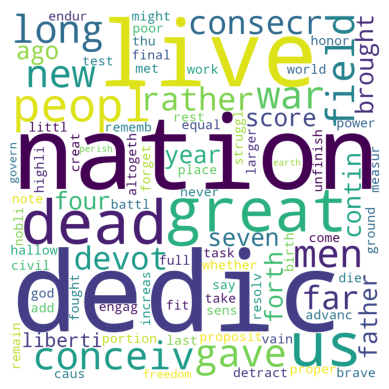

In [82]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(stemmed_tokens))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 4) Word cloud with sentiment classification

### Preprocess the negative and positive lexicons

In [83]:
#Read the positive.txt file
with open('positive.txt', 'r') as file:
    positive_words = file.read()

#Read the negative.txt file
with open('negative.txt', 'r') as file:
    negative_words = file.read()

#Remove punctuation
punctuation = ['.', ',', '!', '?', ':', ';', '-', '(', ')', '[', ']', '{', '}', '—']
for p in punctuation:
    positive_words = positive_words.replace(p, '')
    negative_words = negative_words.replace(p, '')

#Tokenize the positive and negative words
positive_tokens = nltk.word_tokenize(positive_words)
negative_tokens = nltk.word_tokenize(negative_words)

#Stem the positive and negative words
positive_stemmed = [stemmer.stem(token) for token in positive_tokens]
negative_stemmed = [stemmer.stem(token) for token in negative_tokens]

print(negative_stemmed)

['2face', '2face', 'abnorm', 'abolish', 'abomin', 'abomin', 'abomin', 'abomin', 'abort', 'abort', 'abort', 'abrad', 'abras', 'abrupt', 'abruptli', 'abscond', 'absenc', 'absentmind', 'absente', 'absurd', 'absurd', 'absurdli', 'absurd', 'abus', 'abus', 'abus', 'abus', 'abysm', 'abysm', 'abyss', 'accident', 'accost', 'accurs', 'accus', 'accus', 'accus', 'accus', 'accus', 'accusingli', 'acerb', 'acerb', 'acerb', 'ach', 'ach', 'ach', 'achey', 'ach', 'acrid', 'acridli', 'acrid', 'acrimoni', 'acrimoni', 'acrimoni', 'adam', 'adamantli', 'addict', 'addict', 'addict', 'addict', 'admonish', 'admonish', 'admonishingli', 'admonish', 'admonit', 'adulter', 'adulter', 'adulter', 'adulteri', 'adversari', 'adversari', 'advers', 'advers', 'afflict', 'afflict', 'afflict', 'affront', 'afraid', 'aggrav', 'aggrav', 'aggrav', 'aggress', 'aggress', 'aggress', 'aggressor', 'aggriev', 'aggriev', 'aggriv', 'aghast', 'agoni', 'agon', 'agon', 'agonizingli', 'agoni', 'aground', 'ail', 'ail', 'ailment', 'aimless', 'a

### Classify the words of the speech

In [84]:
speech_words_color = {}

for speech_word in tqdm(stemmed_tokens, total = len(stemmed_tokens)):
    if speech_word in positive_stemmed:
        speech_words_color[speech_word] = 'green'
    elif speech_word in negative_stemmed:
        speech_words_color[speech_word] = 'red'
    else:
        speech_words_color[speech_word] = 'grey'

print(speech_words_color)

100%|██████████| 123/123 [00:00<00:00, 18192.38it/s]

{'four': 'grey', 'score': 'grey', 'seven': 'grey', 'year': 'grey', 'ago': 'grey', 'father': 'grey', 'brought': 'grey', 'forth': 'grey', 'contin': 'grey', 'new': 'grey', 'nation': 'grey', 'conceiv': 'grey', 'liberti': 'green', 'dedic': 'green', 'proposit': 'grey', 'men': 'grey', 'creat': 'grey', 'equal': 'grey', 'engag': 'green', 'great': 'green', 'civil': 'green', 'war': 'grey', 'test': 'grey', 'whether': 'grey', 'long': 'red', 'endur': 'grey', 'met': 'grey', 'battl': 'grey', 'field': 'grey', 'come': 'green', 'portion': 'grey', 'final': 'grey', 'rest': 'green', 'place': 'grey', 'gave': 'grey', 'live': 'green', 'might': 'grey', 'altogeth': 'grey', 'fit': 'grey', 'proper': 'green', 'larger': 'grey', 'sens': 'grey', 'consecr': 'grey', 'hallow': 'green', 'ground': 'grey', 'brave': 'green', 'dead': 'red', 'struggl': 'red', 'far': 'grey', 'poor': 'red', 'power': 'green', 'add': 'grey', 'detract': 'red', 'world': 'grey', 'littl': 'grey', 'note': 'grey', 'rememb': 'grey', 'say': 'grey', 'never

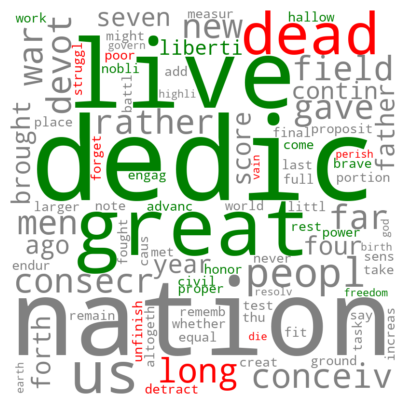

In [85]:
#Word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size = 10).generate(' '.join(stemmed_tokens))


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud.recolor(color_func=lambda word, *args, **kwargs: speech_words_color.get(word, 'black')), interpolation='bilinear')
plt.axis('off')
plt.show()

